In [0]:
path = 'https://raw.githubusercontent.com/umangkejriwal1122/Machine-Learning/master/Data%20Sets/titanic.csv'

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  #### data visualization
import seaborn as sns   #### data visualization

In [0]:
titanic_data = pd.read_csv(path)

In [10]:
titanic_data.head(2)

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C

[2 rows x 12 columns]

In [12]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
titanic_data[['PassengerId','Name','Age']].head()

PassengerId                                               Name   Age
0            1                            Braund, Mr. Owen Harris  22.0
1            2  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0
2            3                             Heikkinen, Miss. Laina  26.0
3            4       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0
4            5                           Allen, Mr. William Henry  35.0

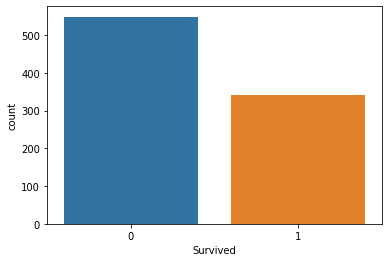

In [14]:
#### Analyse the Data
sns.countplot(titanic_data['Survived'])
plt.show()

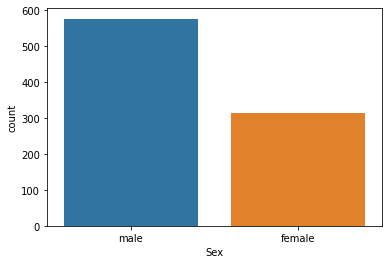

In [15]:
#### Analyse the Data
sns.countplot(titanic_data['Sex'])
plt.show()

In [17]:
#### Analyse the Data
sns.countplot(titanic_data['Pclass'])
plt.show()

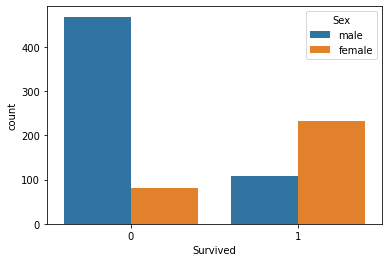

In [18]:
#### Analyse the Data
sns.countplot(titanic_data['Survived'],hue=titanic_data['Sex'])
plt.show()

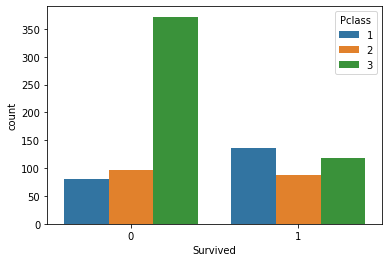

In [30]:
#### Analyse the Data
plt.xlabel("Fare")
plt.ylabel("No.of passengers")
sns.countplot(titanic_data['Survived'],hue=titanic_data['Pclass'])
plt.show()

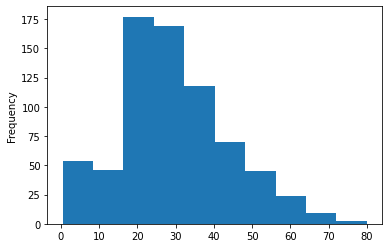

In [20]:
titanic_data['Age'].plot.hist()

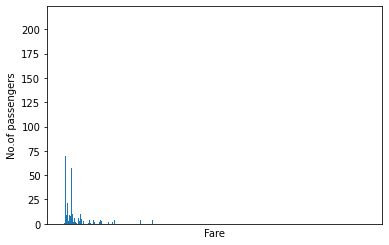

In [35]:
plt.xlabel("Fare")
plt.ylabel("No.of passengers")
plt.xticks([])
plt.hist(titanic_data['Fare'],titanic_data.index)
plt.show()

In [0]:
####  Data Wrangling (Drop Unecessary Columns / Null Values)

In [37]:
titanic_data.head()

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]

In [0]:
titanic_data.drop(["PassengerId",'Name','Ticket','Cabin','Embarked'],axis=1,inplace=True)

In [39]:
titanic_data.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare
0         0       3    male  22.0      1      0   7.2500
1         1       1  female  38.0      1      0  71.2833
2         1       3  female  26.0      0      0   7.9250
3         1       1  female  35.0      1      0  53.1000
4         0       3    male  35.0      0      0   8.0500

In [40]:
titanic_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [44]:
mean_age = titanic_data['Age'].mean()
mean_age = np.round(mean_age,2)
mean_age

29.7

In [0]:
titanic_data['Age'] = titanic_data['Age'].fillna(mean_age)

In [0]:
titanic_data.isnull().sum()

In [0]:
titanic_data.info()

In [50]:
sex = pd.get_dummies(titanic_data['Sex'],drop_first=True)
sex.head()

male
0     1
1     0
2     0
3     0
4     1

In [52]:
pclass = pd.get_dummies(titanic_data['Pclass'],drop_first=True)
pclass.head()

2  3
0  0  1
1  0  0
2  0  1
3  0  0
4  0  1

In [53]:
titanic_data.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare
0         0       3    male  22.0      1      0   7.2500
1         1       1  female  38.0      1      0  71.2833
2         1       3  female  26.0      0      0   7.9250
3         1       1  female  35.0      1      0  53.1000
4         0       3    male  35.0      0      0   8.0500

In [54]:
titanic_data = pd.concat([titanic_data,sex,pclass],axis=1)
titanic_data.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare  male  2  3
0         0       3    male  22.0      1      0   7.2500     1  0  1
1         1       1  female  38.0      1      0  71.2833     0  0  0
2         1       3  female  26.0      0      0   7.9250     0  0  1
3         1       1  female  35.0      1      0  53.1000     0  0  0
4         0       3    male  35.0      0      0   8.0500     1  0  1

In [56]:
titanic_data.drop(['Pclass','Sex'],axis=1,inplace=True)
titanic_data.head()

Survived   Age  SibSp  Parch     Fare  male  2  3
0         0  22.0      1      0   7.2500     1  0  1
1         1  38.0      1      0  71.2833     0  0  0
2         1  26.0      0      0   7.9250     0  0  1
3         1  35.0      1      0  53.1000     0  0  0
4         0  35.0      0      0   8.0500     1  0  1

In [57]:
titanic_data = titanic_data.rename(columns={"male":"sex",2:"pclass_2",3:"pclass_3"})
titanic_data.head()

Survived   Age  SibSp  Parch     Fare  sex  pclass_2  pclass_3
0         0  22.0      1      0   7.2500    1         0         1
1         1  38.0      1      0  71.2833    0         0         0
2         1  26.0      0      0   7.9250    0         0         1
3         1  35.0      1      0  53.1000    0         0         0
4         0  35.0      0      0   8.0500    1         0         1

In [0]:
titanic_data = titanic_data.drop(['Fare'],axis=1)

In [63]:
titanic_data.head()

Survived   Age  SibSp  Parch  sex  pclass_2  pclass_3
0         0  22.0      1      0    1         0         1
1         1  38.0      1      0    0         0         0
2         1  26.0      0      0    0         0         1
3         1  35.0      1      0    0         0         0
4         0  35.0      0      0    1         0         1